# Haberman's Survival Dataset
description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

objective:to determine the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

1.Age of patient at time of operation (numerical)

2.Patient's year of operation (year - 1900, numerical)

3.Number of positive axillary nodes detected (numerical)
A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

4.Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
hb = pd.read_csv("haberman.csv")
hb


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
# (Q) how many data-points and features?
print (hb.shape)

(306, 4)


In [7]:
#(Q) What are the column names in our dataset?
print (hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
# Data points for each class or How many patient survived and how many not

hb["status"].value_counts()

# 1 :=> the patient survived 5 years or longer 
# 2 :=> the patient died within 5 year
# balanced-dataset vs imbalanced datasets
#haberman is a unbalanced dataset as the difference between number of data points is huge

1    225
2     81
Name: status, dtype: int64

Here we got , 225 patients survived 5 years or longer and 81 patients died within 5 year when each one for them undergone surgery of breast cancer.



In [9]:
hb.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


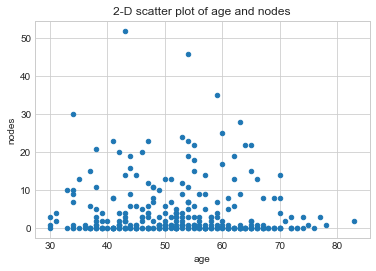

In [42]:
#2-D scatter plot:

hb.plot(kind='scatter', x='age', y='nodes') ;
plt.title("2-D scatter plot of age and nodes")
plt.show()

Observation:

Here we are not able to make any decision regarding patient survival as here class-label is not colored by which we are not able tell who survived or who not.

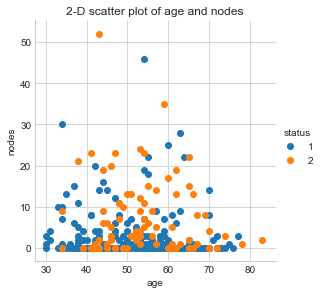

In [43]:
#2-D scatter plot when we did color the points by their class-label/status
#Analysing by taking two feature 'age' on x-axis and 'nodes' on y-axis
# Here 'sns' corresponds to seaborn. 
sns.set_style('whitegrid')

sns.FacetGrid(hb,hue='status',size=4)\
  .map(plt.scatter,'age','nodes')\
  .add_legend()
plt.title("2-D scatter plot of age and nodes")
plt.show()

Observation(s):

Here we can see that blue points are mixed with orange points.

So, by looking at this 2-D scatter plot between 'age' and 'nodes' we cannot make any decision regarding patient will survive or not.

Therefore, we have to check all combination/pair of features to make good classification/decision.

Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'status')

Now, for these combination to analyse we get help from Pair-Plot concept.



Pair combination of each of features


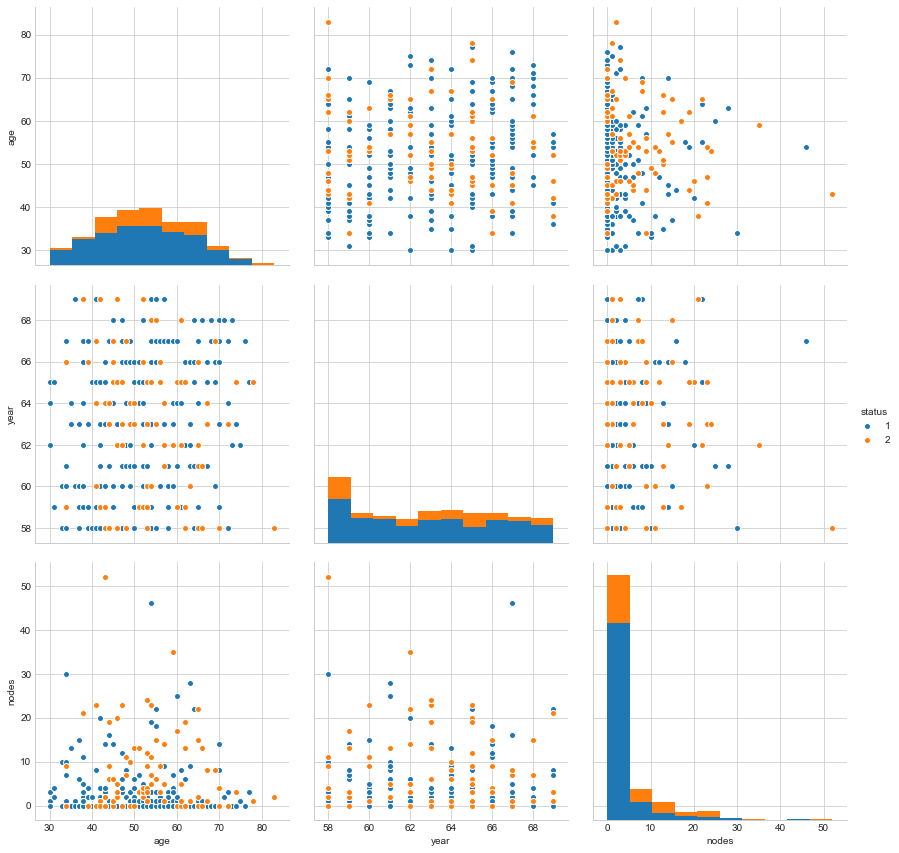

In [20]:
#Pair combination of each of features

plt.close();
sns.set_style("whitegrid")
sns.pairplot(hb, hue="status",vars = ['age' , 'year' ,'nodes' ], size=4)
print('Pair combination of each of features')
plt.show()

Observation(s) :

Here we can clearly see that in any of the combinations of all the 3 features blue points and orange points are not seperated.
So, we conclude that using bivariate analysis we cannot classify that patient will survive or not who had undergone surgery for breast cancer.
If bivariate analysis did not help us in making classification than we do Univariate Analysis(Where we analyse only one variable).

# (1) Histogram ,PDF

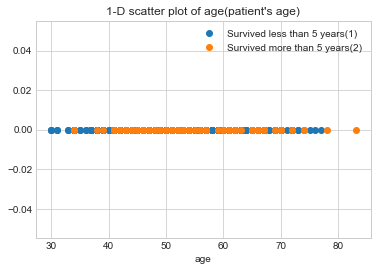

In [21]:
#1-D scatter plot of age(patient's age)
import numpy as np
hb_fiveplus=hb.loc[hb["status"]==1]
hb_fiveminus=hb.loc[hb["status"]==2]

plt.plot(hb_fiveplus["age"],np.zeros_like(hb_fiveplus["age"]),'o') # 'o' is there to show plot as dot/circle shape/o shape instead of just line

plt.plot(hb_fiveminus["age"],np.zeros_like(hb_fiveminus["age"]),'o')

plt.xlabel('age')
plt.legend(['Survived less than 5 years(1) ','Survived more than 5 years(2)' ])
plt.title("1-D scatter plot of age(patient's age)")
plt.show()

Observation(s) :

Here we can see that blue points and orange points are overlapping so we cannot say anything from it.
Now, if we can draw the distibution of both class-label/status, we can then predict that patient will survive or not.
So, try to do this by histogram and PDF which help us to predict.

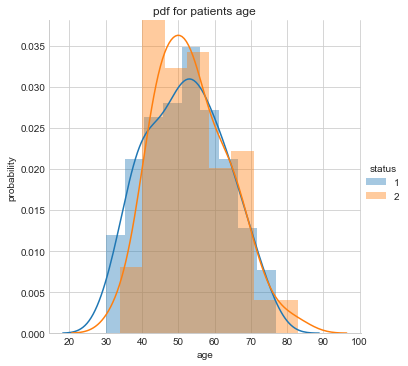

In [56]:
#Histogram/PDF for patient's age(age)

plt.close()

sns.FacetGrid(hb,hue="status",size=5)\
  .map(sns.distplot,"age")\
  .add_legend()
plt.title('pdf for patients age')
plt.ylabel("probability")
plt.show()

Observation(s) :

we can clearly see by using 'age' most of the data points are overlapping .
So, by using 'age' we cannot say anything about status(survival of patient).

In [33]:
import warnings
warnings.filterwarnings('ignore')

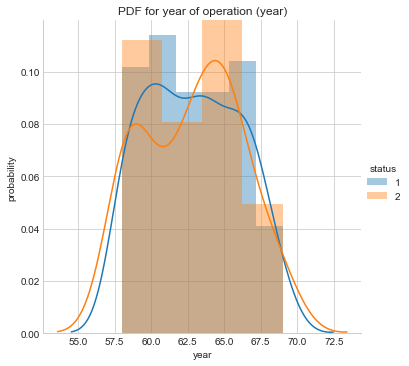

In [34]:
#Histogram/PDF for year of operation (year)
plt.close()

sns.FacetGrid(hb,hue="status",size=5)\
  .map(sns.distplot,"year")\
  .add_legend()
plt.title("PDF for year of operation (year)")
plt.ylabel('probability')
plt.show()

Observation(s) :

we can clearly see by using 'year' i.e year of operation most of the data points are overlapping .
So, by using 'year' we cannot say anything about status(survival of patient).

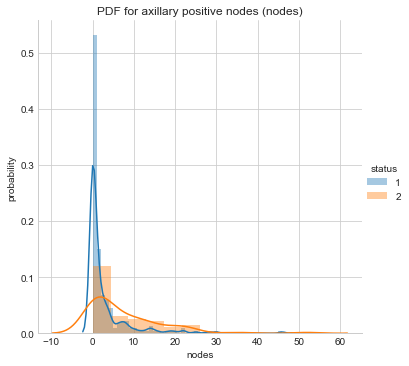

In [35]:
#Histogram/PDF for axillary positive nodes (nodes)
plt.close()

sns.FacetGrid(hb,hue="status",size=5)\
  .map(sns.distplot,"nodes")\
  .add_legend()
plt.title("PDF for axillary positive nodes (nodes)")
plt.ylabel('probability')
plt.show()

Observation(s) :

we can see by using 'nodes'i.e axillary positive nodes of operation though most of the data points are not overlapping . by using 'nodes' we can say about 58% have survived for more than 5 years and 12% have survived less than 5 years who had nodes in the range 0-5

# (2) CDF# 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
**********************************************************
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


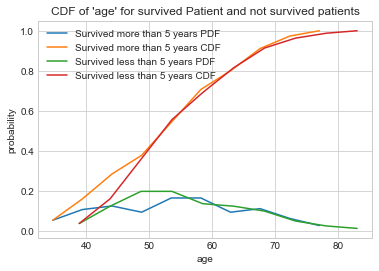

In [36]:
#plot of data points of both class as together(age of patient)


#Plot CDF of 'age' for survived Patient(longer than five years)

counts, bin_edges = np.histogram(hb_fiveplus['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

print('**********************************************************')
#Plot CDF of 'age' for not-survived Patient(died within five years)

counts, bin_edges = np.histogram(hb_fiveminus['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.title("CDF of 'age' for survived Patient and not survived patients")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.ylabel('probability')
plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Survived less than 5 years PDF", "Survived less than 5 years CDF" ])
plt.show()

Observation(s) :

For patient survived more than 5 years : Orange curve is for CDF and Blue curve for PDF .
For patient survived less than 5 years: Red curve is for CDF and Green curve for PDF.
Here we can get to know how many patient survived and not survived more than 5 years having age certain age, for example for age less than 60  we got from CDF curve about 77 percentage of patients survived and 76 percentage patients not survived having age less than 60


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
**********************************************************
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


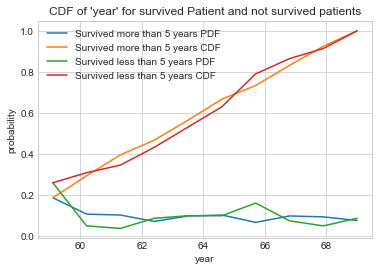

In [37]:
#plot of data points of both class as together(year of operation)


#Plot CDF of 'age' for survived Patient(longer than five years)

counts, bin_edges = np.histogram(hb_fiveplus['year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

print('**********************************************************')
#Plot CDF of 'age' for not-survived Patient(died within five years)

counts, bin_edges = np.histogram(hb_fiveminus['year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.title("CDF of 'year' for survived Patient and not survived patients")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('probability')
plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Survived less than 5 years PDF", "Survived less than 5 years CDF" ])
plt.show()

observations:
patients got operated after 1966 had better chances of survival
patients got operated before 1959 had least chances of survival
    

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
**********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


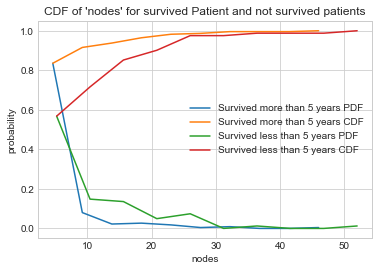

In [38]:
#plot of data points of both class as together(axillary nodes)


#Plot CDF of 'age' for survived Patient(longer than five years)

counts, bin_edges = np.histogram(hb_fiveplus['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

print('**********************************************************')
#Plot CDF of 'age' for not-survived Patient(died within five years)

counts, bin_edges = np.histogram(hb_fiveminus['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.title("CDF of 'nodes' for survived Patient and not survived patients")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Survived less than 5 years PDF", "Survived less than 5 years CDF" ])
plt.show()

observation:
82% of patients had nodes less than 5.
90% of patients had nodes less than 10 survived more than 5 years.
70% of patients had nodes less than 10 died within 5 years.
it can be seen from the plot that as the number of nodes increased the survival rate decreased

    

# (3) Mean,Variance and Standard-Deviation

In [39]:
#Means ,calculate the Central Tendency of the observation of a feature

print('Means:')
print(np.mean(hb_fiveplus['age']))
print(np.mean(hb_fiveminus['age']))

#Standard-Deviation will tell us about Spread i.e what are the average square distance of each point from the Mean

print("\nStd-dev:");
print(np.std(hb_fiveplus['age']))
print(np.std(hb_fiveminus['age']))

#But one or small number of Outlier(an error) can corrupt both mean and standard-deviation

print('\nmean')
print('For Patients lived longer than 5 years:'+str(np.mean(np.append(hb_fiveplus['age'],350))))

print('\nStd-dev')
print('For Patients lived longer than 5 years :'+ str(np.std(np.append(hb_fiveminus['age'],320))))

Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131

mean
For Patients lived longer than 5 years:53.336283185840706

Std-dev
For Patients lived longer than 5 years :30.907328236632623


# (4) Median, Percentile, Quantile, IQR, MAD

In [40]:
#Median is equivalent to Mean, it calculates the middle value of an obervastion

print('\nMedian:')
print('Median of patient age for patient survived longer than 5 years: '+str(np.median(hb_fiveplus['age'])))
print('Median of patient age for patient survived less than 5 years: '+str(np.median(hb_fiveminus['age'])))

#Median with an outlier
print('\nMedian with an outlier for  patient survived longer than 5 years')
# there is no corruption by an outlier
print(np.median(np.append(hb_fiveplus['age'],500))) 


print('\nQuantiles')
print('0th,25th,50th,75th percentile value of patient age of  patient survived longer than 5 years:'+str(np.percentile(hb_fiveplus['age'],np.arange(0,100,25))))
print('0th,25th,50th,75th percentile value of patient age of  patient survived less than 5 years:'+str(np.percentile(hb_fiveminus['age'],np.arange(0,100,25))))

print('\n90th Percentile')
print('90th percentile value of patient age for patient survived longer than 5 years:'+str(np.percentile(hb_fiveplus['age'],90)))
print('90th percentile value of patient age for  patient survived less than 5 years:'+str(np.percentile(hb_fiveminus['age'],90)))

#MAD-Median Absolute Deviation is equivalent to standard-deviation, it measure that how far our data points are from median)

print('\nMedian Abolute Deviation')
from statsmodels import robust
print('MAD value of patient age for patient survived longer than 5 years:'+str(robust.mad(hb_fiveplus['age'])))
print('MAD value of patient age for patient survived less than 5 years:'+str(robust.mad(hb_fiveminus['age'])))

print('\nMAD with an outlier for patient survived longer than 5 years')
#we can see that there is no corruption by an outlier
print(robust.mad(np.append(hb_fiveplus['age'],400))) 




Median:
Median of patient age for patient survived longer than 5 years: 52.0
Median of patient age for patient survived less than 5 years: 53.0

Median with an outlier for  patient survived longer than 5 years
52.0

Quantiles
0th,25th,50th,75th percentile value of patient age of  patient survived longer than 5 years:[30. 43. 52. 60.]
0th,25th,50th,75th percentile value of patient age of  patient survived less than 5 years:[34. 46. 53. 61.]

90th Percentile
90th percentile value of patient age for patient survived longer than 5 years:67.0
90th percentile value of patient age for  patient survived less than 5 years:67.0

Median Abolute Deviation
MAD value of patient age for patient survived longer than 5 years:13.343419966550417
MAD value of patient age for patient survived less than 5 years:11.860817748044816

MAD with an outlier for patient survived longer than 5 years
13.343419966550417


# (5)box plot

Box-plot with whiskers


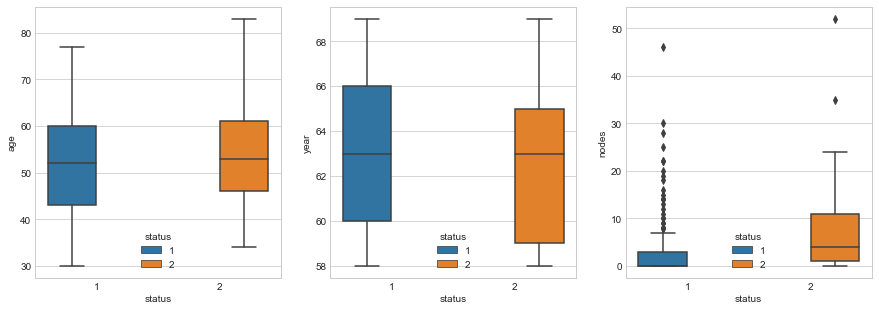

In [60]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

print("Box-plot with whiskers")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(hb.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=hb, ax=axes[idx],hue="status")
    
plt.show() 

# (5)violin plot


A violin plot of all features


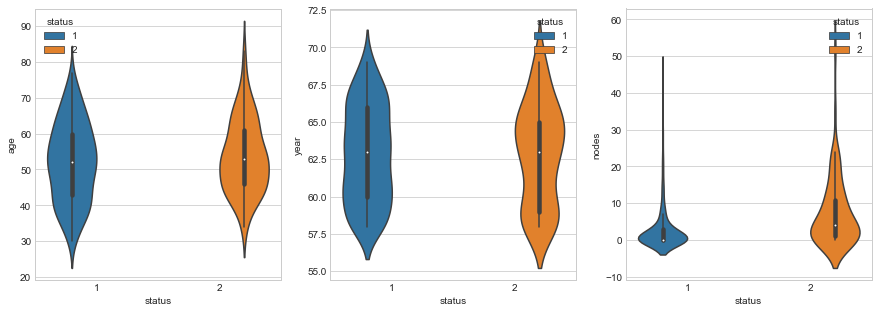

In [66]:
#A violin plot combines both Histogram/PDF and box-plot 
print("A violin plot of all features")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(hb.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=hb,hue="status", ax=axes[idx],)

plt.show() 

Observations
The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
Almost 82% of the patients had less than or equal to 5 positive lymph nodes. 
The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. 


# (3.11) Multivariate probability density, contour plot.



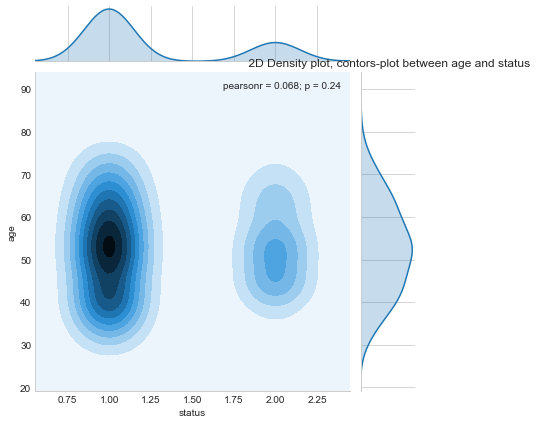

In [53]:
#2D Density plot, contors-plot
sns.jointplot(x="status", y='age', data=hb, kind="kde",hue='status');
plt.title(' 2D Density plot, contors-plot between age and status')
plt.show();

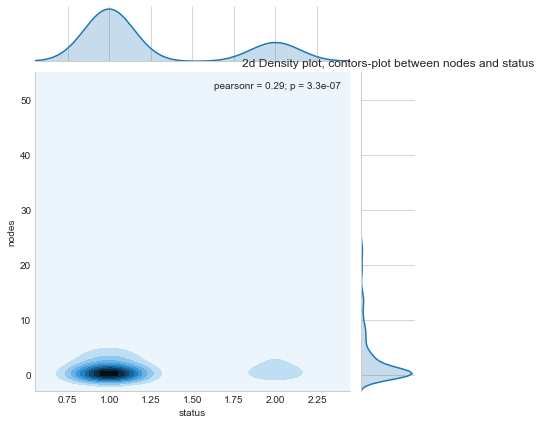

In [50]:
#2D Density plot, contors-plot

sns.jointplot(x="status", y='nodes', data=hb, kind="kde");
plt.title("2d Density plot, contors-plot between nodes and status")
plt.show();

# conclusion

1.age and year of operation don't play much role in conclusion
Younger people has more chance of survival

2.nodes afffect on survival status
patients survived longer than 5 years mostly had lesser value of nodes than those who died within 5 years